In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import util
import warnings; 
warnings.simplefilter('ignore')

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the airquality training dataset
try:
    df = pd.read_csv("data/TrainingData.csv")
    print "Airquality dataset has {} samples with {} features each.".format(*df.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
print "\n", df.head()

Airquality dataset has 37821 samples with 95 features each.

   rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
0      1        1                      1                 10  Saturday    21   
1      2        1                      2                 10  Saturday    22   
2      3        1                      3                 10  Saturday    23   
3      4        1                      4                 10    Sunday     0   
4      5        1                      5                 10    Sunday     1   

   Solar.radiation_64  WindDirection..Resultant_1  \
0                0.01                       117.0   
1                0.01                       231.0   
2                0.01                       247.0   
3                0.01                       219.0   
4                0.01                         2.0   

   WindDirection..Resultant_1018  WindSpeed..Resultant_1      ...        \
0                          187.0                     0.3      ...     

In [9]:
# Display a description of the dataset
display(df.describe())

,rowID,chunkID,position_within_chunk,month_most_common,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,WindSpeed..Resultant_1018,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
count,37821.000000,37821.000000,37821.000000,37821.000000,37821.000000,37395.000000,36391.000000,9756.000000,36391.000000,9756.000000,...,35241.000000,1744.000000,6649.000000,5694.000000,9598.000000,37228.000000,36831.000000,1744.000000,37011.000000,1744.000000
mean,27735.342878,105.691415,96.809365,6.577695,11.501256,0.223785,189.561023,189.946812,5.175914,5.014463,...,1.791193,0.243089,1.392728,1.839491,2.744575,0.480062,0.770668,0.634703,0.915629,0.971857
std,16073.216333,60.880682,55.496493,3.446589,6.921352,0.344112,96.596566,96.304640,3.091361,2.970603,...,1.064498,0.331440,0.987366,1.008787,2.107100,0.301249,0.536628,0.282642,0.928582,0.992460
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,0.100000,0.100000,0.100000,0.100000,...,0.000000,0.000000,0.133306,0.057648,0.097218,0.291653,0.291653,0.291653,-0.025698,0.051396
25%,13770.000000,53.000000,49.000000,4.000000,6.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,27749.000000,106.000000,97.000000,7.000000,12.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,41778.000000,159.000000,145.000000,9.000000,17.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,55368.000000,210.000000,192.000000,12.000000,23.000000,1.430000,360.000000,360.000000,23.000000,22.700000,...,19.361499,4.877184,9.997963,10.267026,15.759007,4.666455,4.569237,3.208188,13.054635,8.557467


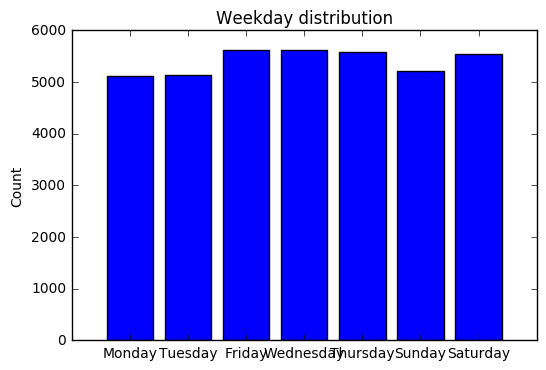

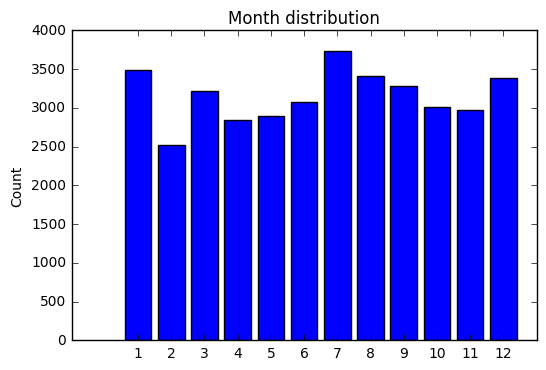

In [10]:
# Visual analysis

util.plotFeature(df['weekday'].value_counts().to_dict(), 'Weekday distribution')
util.plotFeature(df['month_most_common'].value_counts().to_dict(), 'Month distribution')

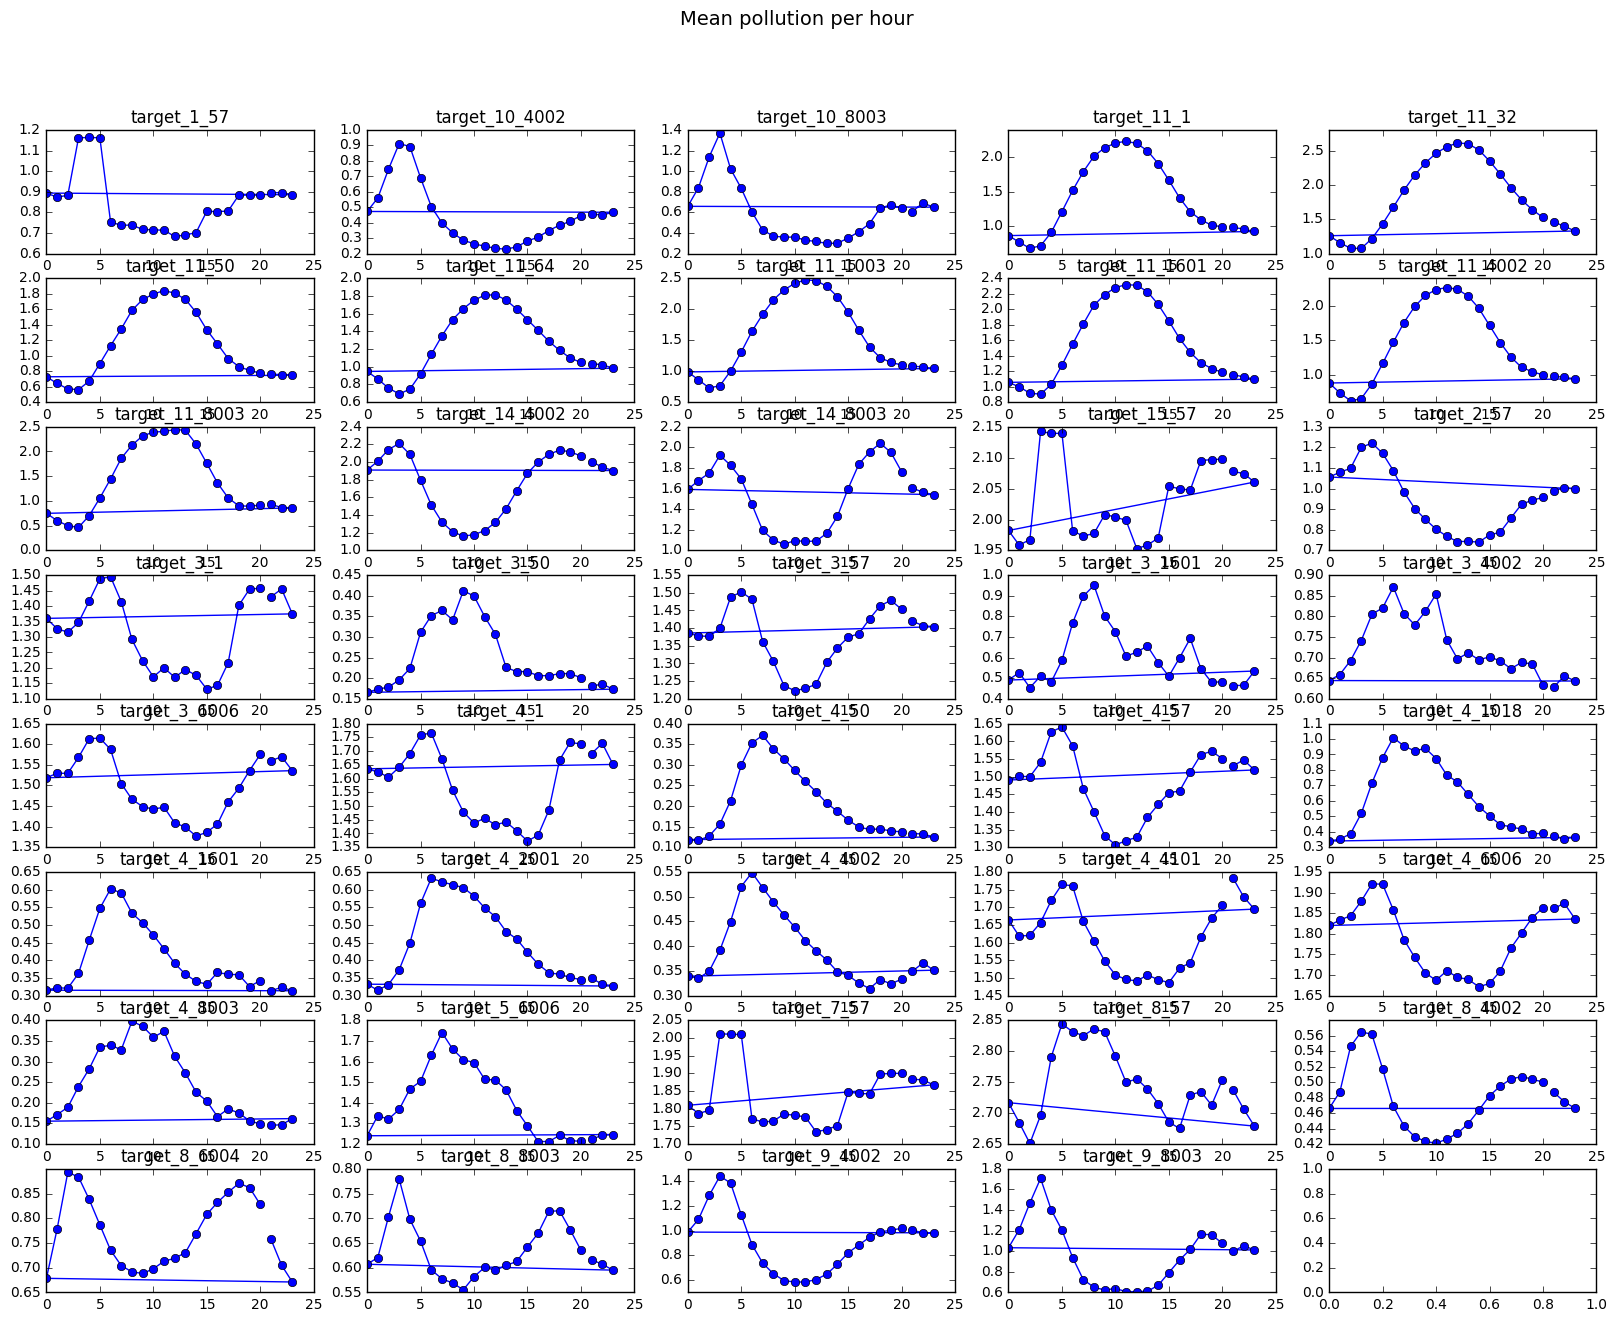

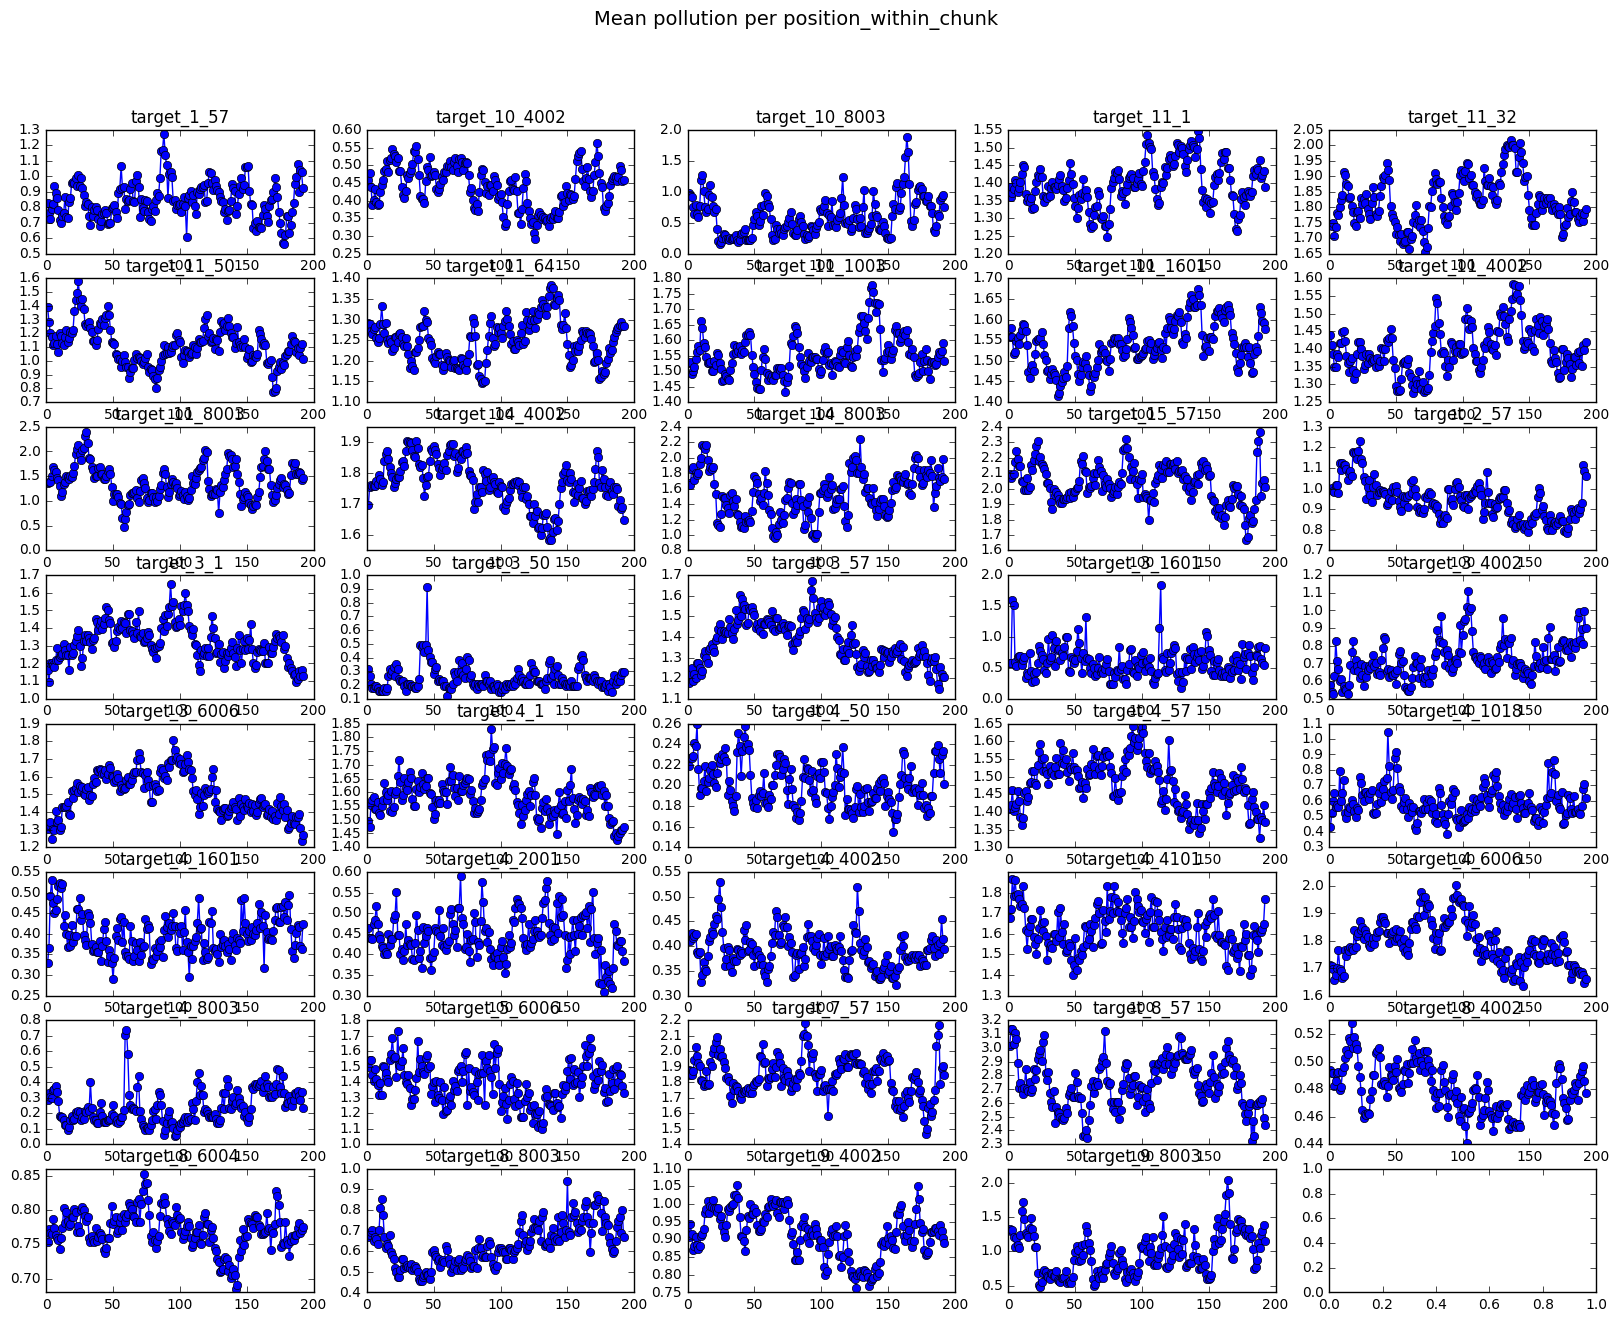

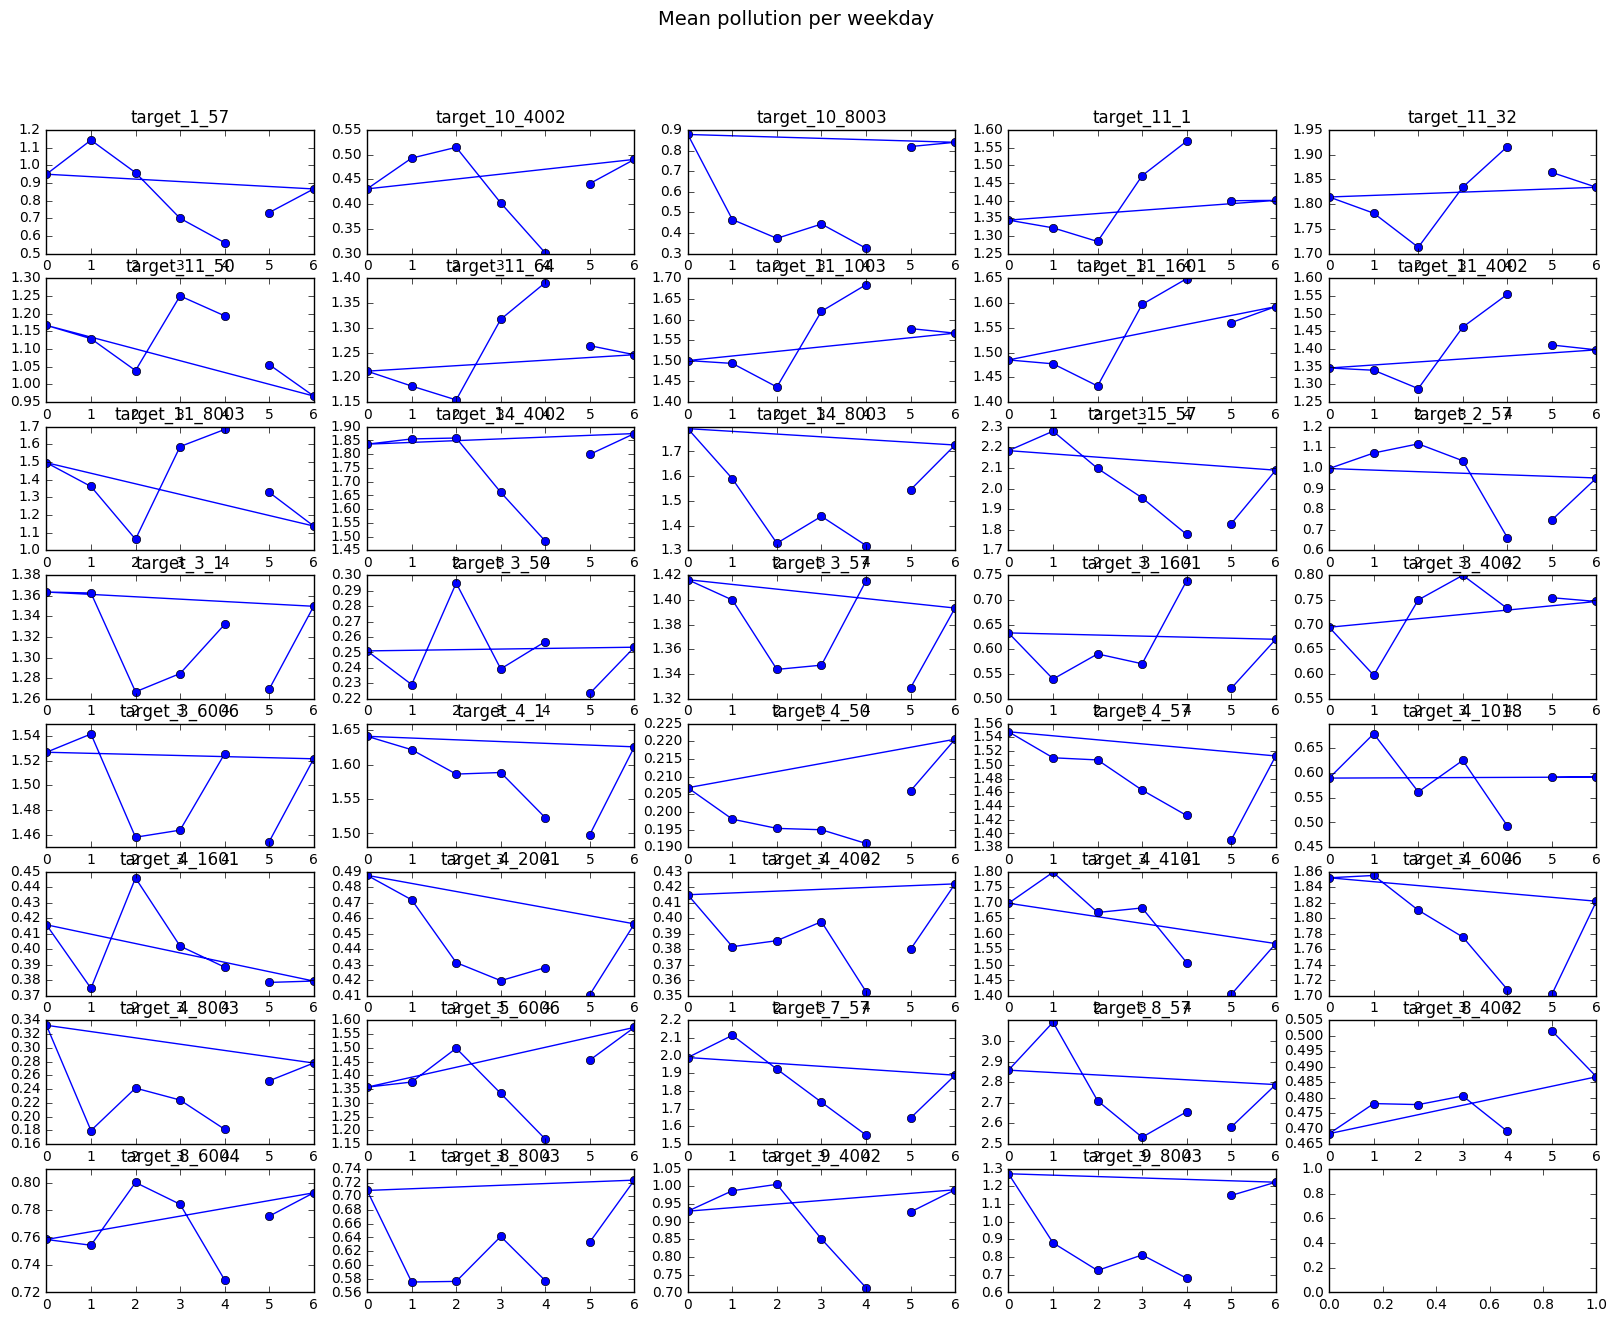

In [11]:
features = df.columns.values
labels = [col for col in features if 'target' in col]

# plot after grouping by hour and averaging labels
util.plotLabelsAfterGroupingInOnePlot(df, 'hour', labels)

# plot after grouping by position_within_chunk and averaging labels
util.plotLabelsAfterGroupingInOnePlot(df, 'position_within_chunk', labels)

# plot after grouping by position_within_chunk and averaging labels
# dict to transform dayOfWeek to numeric
dayOfWeek={'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df['weekday'] = df['weekday'].map(dayOfWeek)
util.plotLabelsAfterGroupingInOnePlot(df, 'weekday', labels)

#util.plotLabelsAfterGroupingInOnePlot(df, 'chunkID', labels)
#util.plotLabelsAfterGroupingInOnePlot(df, 'month_most_common', labels)

In [12]:
# Approach to train model, create predictions and calculate testing score

# Because xgboost does not support multi label classification, a model will be created for each of the 39 labels

## for each label, the next steps are done:

# split all the data in X (features) and y (label)
# remove all rows with NA for the label
# split the remaining data in train and test set

# one hot encoding categorical features in training data
# create XGB model with optimal parameters
# fit the XGB model on the training data

# one hot encoding categorical features in testing data
# calculate testing score

## Summarize
# calculate final testing score by avering testing score of all models
# compare this with benchmark

In [17]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pickle
from sklearn.metrics import mean_absolute_error

train_features = ['chunkID', 'position_within_chunk', 'month_most_common', 'hour', 'weekday']
# the categorical features, they should be one hot encoded before applying xgboost
cols_to_transform = ['chunkID', 'month_most_common', 'weekday']

# build the model and save test error for each model
test_errors = list()
for label in labels:

    #get features (X) and label (y)
    X = df[train_features]
    y = df[label]
    
    # remove rows where label is NA (since we can't train)
    not_null_indexes = pd.notnull(y)
    X_not_null = X[not_null_indexes]
    y_not_null = y[not_null_indexes] 
    
    # split data in train and test
    X_train, X_test, y_train, y_test = train_test_split(X_not_null, y_not_null, test_size = 0.05)
    
    # transform categorical features using one hot encoding
    X_train_encoded = pd.get_dummies(X_train, columns = cols_to_transform)
    X_test_encoded = pd.get_dummies(X_test, columns = cols_to_transform)
    
    # only keep cols that are present in both train/test data. Otherwise predict can fail.
    X_train_cols = X_train_encoded.columns.values
    X_test_cols = X_test_encoded.columns.values
    X_common_cols = [val for val in X_train_cols if val in X_test_cols]
    X_train_encoded = X_train_encoded[X_common_cols]
    X_test_encoded = X_test_encoded[X_common_cols]
    
    # set params
    xgb_params = {'eta': 0.1, 'seed': 21, 'subsample': 0.8, 
                  'colsample_bytree': 0.8, 'max_depth':5, 'min_child_weight':1,
                  'objective': 'reg:linear', 'eval_metric' : 'mae'}
    
    X_train_matrix = xgb.DMatrix(X_train_encoded, y_train)
    
    final_model = xgb.train(params = xgb_params, dtrain = X_train_matrix, num_boost_round = 1000)    
    pickle.dump(final_model, open('models/' + label + "_model.dat", "wb"))
    print('saved model ' + label)
    
    # test score 
    X_test_matrix = xgb.DMatrix(X_test_encoded)
    y_pred = final_model.predict(X_test_matrix)
    
    test_error = mean_absolute_error(y_pred, y_test)
    test_errors.append(test_error)

print(test_errors)
final_score = np.mean(test_errors)
print('\nFinal test score: ' + str(final_score))

saved model target_1_57
saved model target_10_4002
saved model target_10_8003
saved model target_11_1
saved model target_11_32
saved model target_11_50
saved model target_11_64
saved model target_11_1003
saved model target_11_1601
saved model target_11_4002
saved model target_11_8003
saved model target_14_4002
saved model target_14_8003
saved model target_15_57
saved model target_2_57
saved model target_3_1
saved model target_3_50
saved model target_3_57
saved model target_3_1601
saved model target_3_4002
saved model target_3_6006
saved model target_4_1
saved model target_4_50
saved model target_4_57
saved model target_4_1018
saved model target_4_1601
saved model target_4_2001
saved model target_4_4002
saved model target_4_4101
saved model target_4_6006
saved model target_4_8003
saved model target_5_6006
saved model target_7_57
saved model target_8_57
saved model target_8_4002
saved model target_8_6004
saved model target_8_8003
saved model target_9_4002
saved model target_9_8003
[0.182

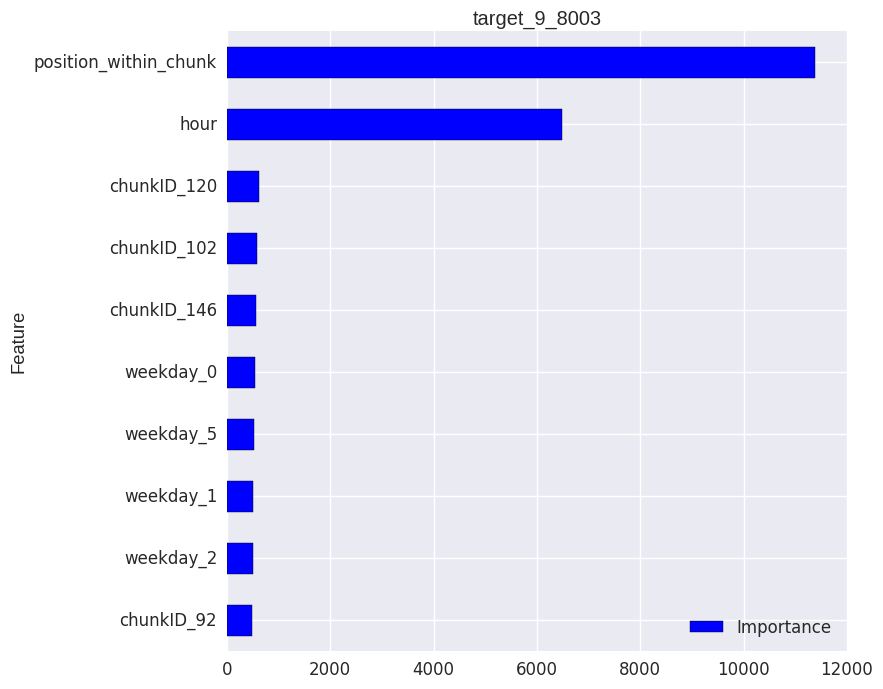

In [18]:
# plot feature importances
import seaborn as sns
sns.set(font_scale = 1.2)

importances = final_model.get_fscore()
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True, ascending = True)
importance_frame.tail(10).plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'blue', title=label)

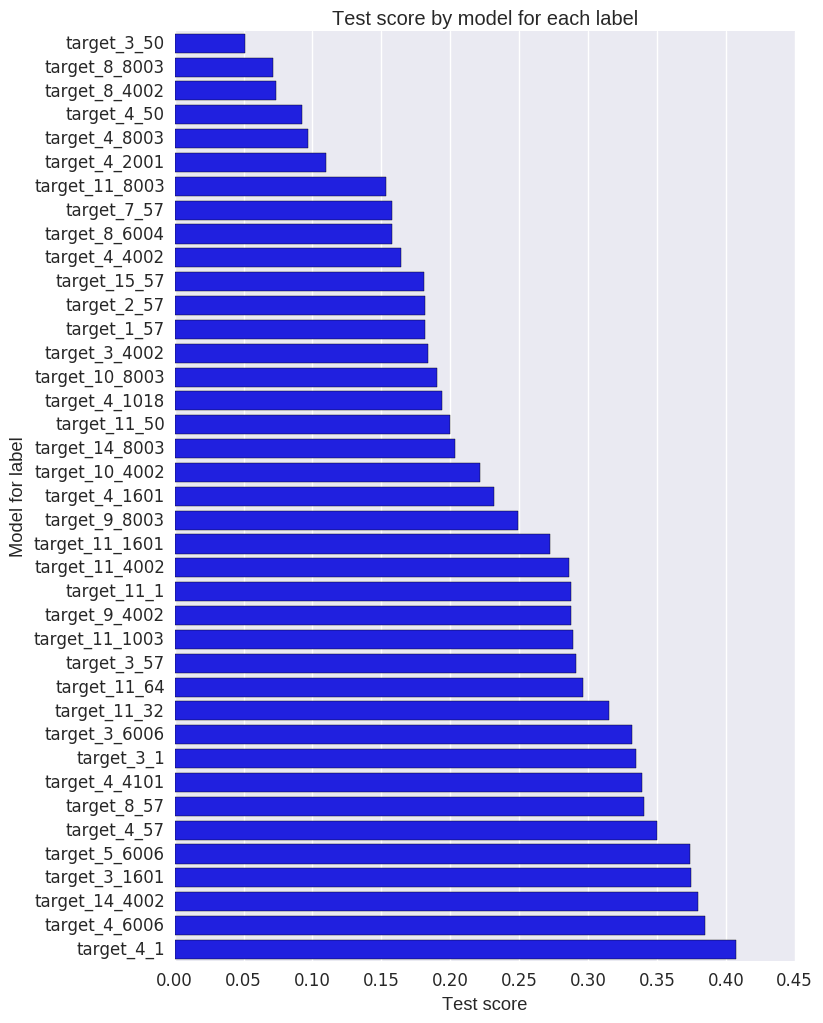

In [43]:
# plot testscores
df_scores = pd.DataFrame(list(map(list, zip(labels,test_errors))), columns=['model', 'score'])
df_scores = df_scores.sort_values("score", ascending=True)
f, ax = plt.subplots(figsize=(8, 12))
ax = sns.barplot(x="score", y="model", data=df_scores, color="b");
ax.set(xlabel='Test score', ylabel='Model for label', title='Test score by model for each label')
plt.show()